In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Importing data
titanic_data = pd.read_csv(r"F:\intern\Titanic\Titanic-Dataset.csv")
print(titanic_data.head(15))
print("Shape:", titanic_data.shape)
titanic_data.info()

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

In [3]:
# Preprocessing
print(titanic_data.isnull().sum())
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
print("Mode of Embarked:", titanic_data['Embarked'].mode()[0])
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Mode of Embarked: S
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


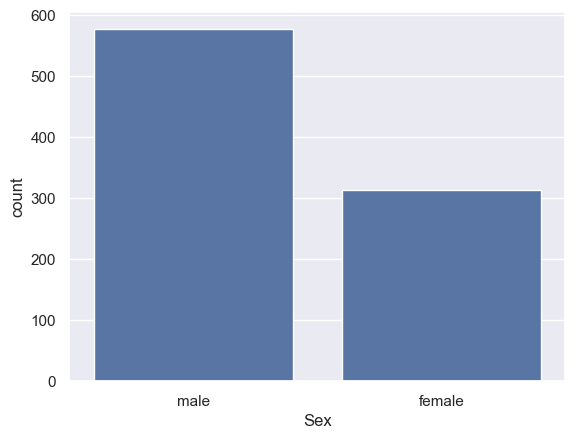

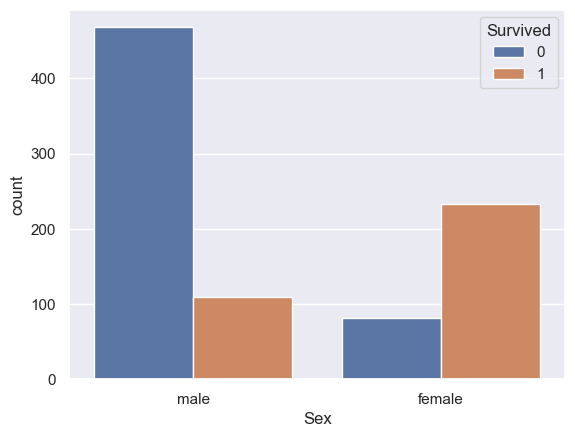

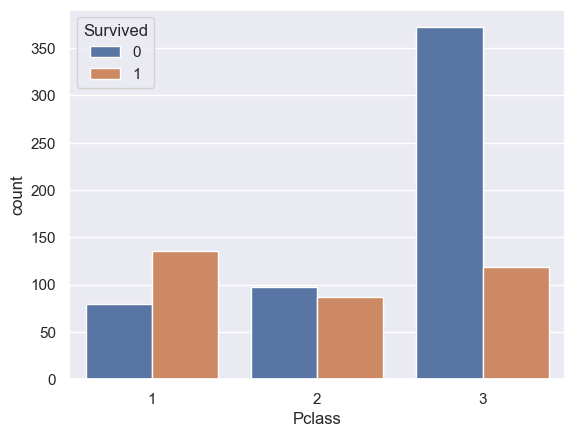

In [4]:
# Visualization
sns.set()
sns.countplot(data=titanic_data, x='Sex')
plt.show()
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.show()
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.show()

In [5]:
# Encoding categorical data
print(titanic_data['Sex'].value_counts())
print(titanic_data['Embarked'].value_counts())
titanic_data.replace({
    'Sex': {'male': 1, 'female': 2},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}, inplace=True)

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [6]:
# Features and splitting
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Model training and evaluation
model = LogisticRegression()
model.fit(X_train, y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, X_train_prediction))
print("Testing Accuracy:", accuracy_score(y_test, X_test_prediction))

Training Accuracy: 0.8019662921348315
Testing Accuracy: 0.7988826815642458


In [8]:
# Predict custom input
def get_passenger_details():
    Pclass = int(input("Enter Passenger Class (1, 2, or 3): "))
    Sex = input("Enter Sex (male or female): ").lower()
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of siblings/spouses aboard: "))
    Parch = int(input("Enter number of parents/children aboard: "))
    Fare = float(input("Enter Fare: "))
    Embarked = input("Enter Port of Embarkation (S, C, Q): ").upper()
    Sex = 1 if Sex == 'male' else 2
    Embarked = {'S': 0, 'C': 1, 'Q': 2}.get(Embarked, 0)
    passenger_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })
    prediction = model.predict(passenger_data)
    result = "Survived" if prediction[0] == 1 else "Did not survive"
    print(f"The passenger would have: {result}")